In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

In [3]:
data_txt = "data.txt"

In [4]:
data = np.loadtxt(data_txt)

In [5]:
x = data[:, :2]

In [6]:
y = data[:, 2].astype(int)

In [7]:
print("x-shape: ", x.shape)

x-shape:  (100, 2)


In [8]:
print("y-shape: ", y.shape)

y-shape:  (100,)


In [9]:
rand = np.random.default_rng(42)

In [10]:
perm = rand.permutation(x.shape[0])

In [11]:
x = x[perm]

In [12]:
y = y[perm]

In [13]:
#Now its time to formulate the calcualation to calculate the normalized data.

In [14]:
mu = x.mean(axis = 0, keepdims = True)

In [15]:
sigma = x.std(axis = 0, keepdims = True)

In [16]:
eps = 1e-8

In [17]:
x_normalized = (x - mu) / (sigma + eps)

In [18]:
print("X-Normalized Mean:", x_normalized.mean(axis=0))

X-Normalized Mean: [-2.91433544e-18 -4.88498131e-17]


In [19]:
print("X-Normalized Unit Variance:", x_normalized.std(axis=0))

X-Normalized Unit Variance: [1. 1.]


In [23]:
split = int(0.8 * x_normalized.shape[0])
x_train, y_train = x_normalized[:split], y[:split]
x_test,  y_test  = x_normalized[split:],  y[split:]

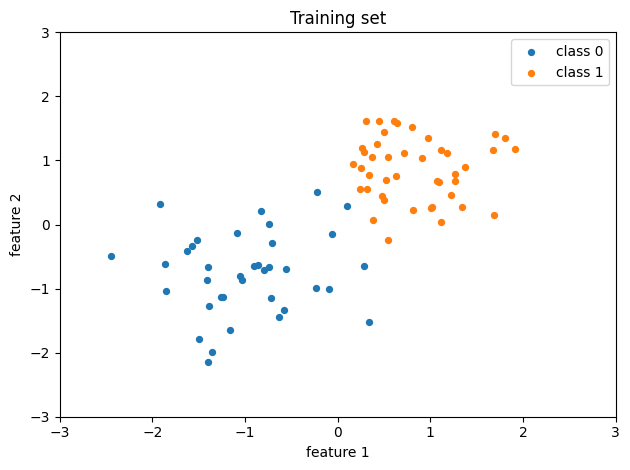

In [25]:
m0 = (y_train == 0)
m1 = (y_train == 1)
plt.figure()
plt.scatter(x_train[m0, 0], x_train[m0, 1], label="class 0", s=18)
plt.scatter(x_train[m1, 0], x_train[m1, 1], label="class 1", s=18)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Training set")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.tight_layout()
plt.show()

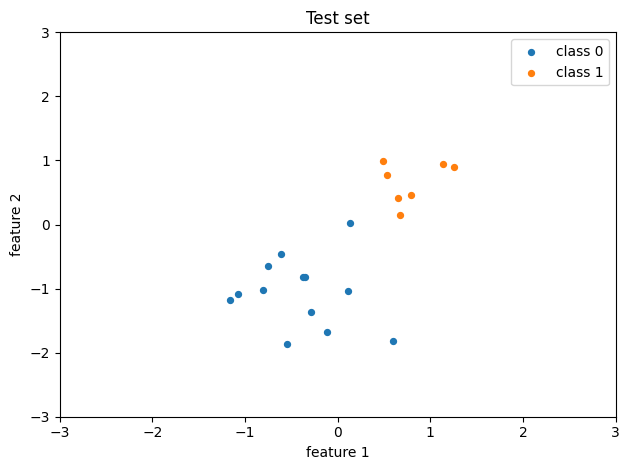

In [26]:
m0 = (y_test == 0)
m1 = (y_test == 1)
plt.figure()
plt.scatter(x_test[m0, 0], x_test[m0, 1], label="class 0", s=18)
plt.scatter(x_test[m1, 0], x_test[m1, 1], label="class 1", s=18)
plt.xlabel("feature 1")
plt.ylabel("feature 2")
plt.title("Test set")
plt.xlim(-3, 3)
plt.ylim(-3, 3)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
class Perceptron:
    def __init__(self, num_features, lr=0.1, seed=0):
        self.num_features = num_features
        self.lr = lr
        rng = np.random.default_rng(seed)
        self.weights = np.zeros(num_features, dtype=float)
        self.bias = 0.0

    def forward(self, x):
        linear = x @ self.weights + self.bias
        predictions = (linear >= 0).astype(int)
        return predictions

    def backward(self, x, y):
        y_hat = self.forward(x)
        errors = y - y_hat
        return errors

    def train(self, x, y, epochs=25):
        y = y.astype(int).ravel()
        for _ in range(epochs):
            for i in range(y.shape[0]):
                xi = x[i]
                yi = y[i]
                y_hat = 1 if (xi @ self.weights + self.bias) >= 0 else 0
                err = yi - y_hat
                self.weights += self.lr * err * xi
                self.bias += self.lr * err

    def evaluate(self, x, y):
        y_hat = self.forward(x)
        return (y_hat == y).mean()

In [30]:
perc = Perceptron(num_features=x_train.shape[1], lr=0.1)

In [31]:
perc.train(x_train, y_train, epochs=25)

In [35]:
print("The Train Accuracy:", perc.evaluate(x_train, y_train))

The Train Accuracy: 1.0


In [37]:
print("The Test Accuracy:", perc.evaluate(x_test, y_test))

The Test Accuracy: 1.0


In [45]:
perc = Perceptron(num_features=x_train.shape[1], lr=0.1)

In [48]:
for e in range(5):
    perc.train(x_train, y_train, epochs = 1)
    tr = perc.evaluate(x_train, y_train)
    te = perc.evaluate(x_test, y_test)
    print(f"epoch {e+1}: train accuracy = {tr:.3f}, test accuracy = {te:.3f}")

epoch 1: train accuracy = 0.975, test accuracy = 0.950
epoch 2: train accuracy = 0.975, test accuracy = 0.950
epoch 3: train accuracy = 0.975, test accuracy = 0.950
epoch 4: train accuracy = 1.000, test accuracy = 1.000
epoch 5: train accuracy = 1.000, test accuracy = 1.000


In [49]:
train_acc_perc = perc.evaluate(x_train, y_train) * 100

In [51]:
test_acc_perc = perc.evaluate(x_test, y_test) * 100

In [53]:
print(f"Train Accuracy Percentage: {train_acc_perc:.1f}%")

Train Accuracy Percentage: 100.0%


In [55]:
print(f"Test Accuracy Percentage:  {test_acc_perc:.1f}%")

Test Accuracy Percentage:  100.0%


In [56]:
weight = perc.weights

In [57]:
bias = perc.bias

In [58]:
xs = np.linspace(-2.5, 2.5, 300)

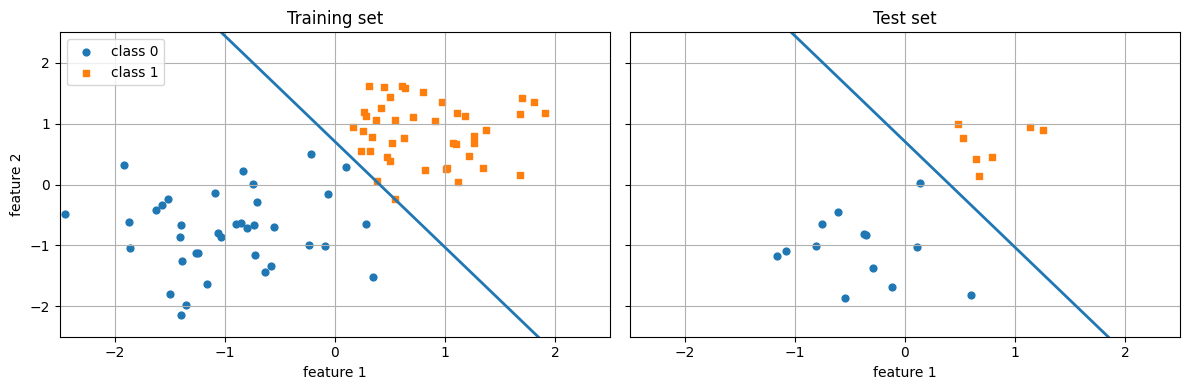

In [63]:
fig, axes = plt.subplots(1, 2, figsize=(12, 4), sharex=True, sharey=True)

m0 = (y_train == 0); m1 = (y_train == 1)
axes[0].scatter(x_train[m0, 0], x_train[m0, 1], s=24, marker="o", label="class 0")
axes[0].scatter(x_train[m1, 0], x_train[m1, 1], s=24, marker="s", label="class 1")
axes[0].plot(xs, (-(weight[0]*xs + bias))/weight[1], lw=2)
axes[0].set_title("Training set")
axes[0].set_xlabel("feature 1")
axes[0].set_ylabel("feature 2")
axes[0].set_xlim(-2.5, 2.5)
axes[0].set_ylim(-2.5, 2.5)
axes[0].grid(True)
axes[0].legend(loc="upper left")

m0 = (y_test == 0); m1 = (y_test == 1)
axes[1].scatter(x_test[m0, 0], x_test[m0, 1], s=24, marker="o", label="class 0")
axes[1].scatter(x_test[m1, 0], x_test[m1, 1], s=24, marker="s", label="class 1")
axes[1].plot(xs, (-(weight[0]*xs + bias))/weight[1], lw=2)
axes[1].set_title("Test set")
axes[1].set_xlabel("feature 1")
axes[1].set_xlim(-2.5, 2.5)
axes[1].set_ylim(-2.5, 2.5)
axes[1].grid(True)

plt.tight_layout()
plt.show()